Problem 1 - Executing machine translation and code reading

In [9]:
import numpy as np
import keras
import os
from pathlib import Path
import zipfile

# Path to the downloaded zip file
zip_file_path = r"C:\Users\DELL\Downloads\fra-eng.zip"

# Destination directory to extract the contents
extract_dir = Path(zip_file_path).parent / "fra-eng-dataset"

# Ensure the destination directory exists
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print(f"Extracted files to {extract_dir}")

# Path to the extracted dataset file
dataset_file_path = extract_dir / "fra.txt"

# Load the dataset
with open(dataset_file_path, "r", encoding="utf-8") as f:
    lines = f.read().strip().splitlines()

# Display some sample lines from the dataset
print("Sample lines from the dataset:")
for line in lines[:5]:
    print(line.strip())

# Hyperparameter settings
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
data_path = os.path.join(extract_dir, "fra.txt")  # Path to the data txt file on disk.

# Data loading and preprocessing
# Vectorizing the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
for line in lines[: min(num_samples, len(lines) - 1)]:
    # Split by tab and ignore the metadata (third part)
    parts = line.split("\t")
    if len(parts) >= 2:  # Make sure there are at least two parts
        input_text, target_text = parts[0], parts[1]
        target_text = "\t" + target_text + "\n"  # Add start and end tokens for the decoder
        input_texts.append(input_text)
        target_texts.append(target_text)
        input_characters.update(input_text)
        target_characters.update(target_text)


# Character indexing
input_characters = sorted(input_characters)
target_characters = sorted(target_characters)
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

# Dictionary mapping
input_token_index = {char: i for i, char in enumerate(input_characters)}
target_token_index = {char: i for i, char in enumerate(target_characters)}
reverse_input_char_index = {i: char for char, i in input_token_index.items()}
reverse_target_char_index = {i: char for char, i in target_token_index.items()}

# Initializing One-Hot Encoding
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(target_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(target_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

# Populating one-hot encoded arrays
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0

# Defining the encoder model
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Printing the results
print("Input texts:", input_texts[:5])  # Prints the first 5 English sentences
print("Target texts:", target_texts[:5])  # Prints the first 5 French sentences
print("Input characters:", input_characters)
print("Target characters:", target_characters)


Extracted files to C:\Users\DELL\Downloads\fra-eng-dataset
Sample lines from the dataset:
Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Go.	Marche.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)
Go.	En route !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)
Go.	Bouge !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)
Input texts: ['Go.', 'Go.', 'Go.', 'Go.', 'Hi.']
Target texts: ['\tVa !\n', '\tMarche.\n', '\tEn route !\n', '\tBouge !\n', '\tSalut !\n']
Input characters: [' ', '!', '"', '$', '%', '&', "'", ',', '-', '.', '0', '1', '2', '3', '5', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 

Problem 2 - Running a trained model for image captioning

In [25]:
import os

# Create the directories
os.makedirs('./models', exist_ok=True)
os.makedirs('./data', exist_ok=True)


In [28]:
import shutil

# Move files to the specified directories
shutil.move('C:/Users/DELL/ML/model/encoder-5-3000.pkl', './models/encoder-5-3000.pkl')
shutil.move('C:/Users/DELL/ML/model/decoder-5-3000.pkl', './models/decoder-5-3000.pkl')
shutil.move('C:/Users/DELL/ML/data/vocab.pkl', './data/vocab.pkl')



'./data/vocab.pkl'

In [29]:
import os

# List contents of ./models/ directory
models_files = os.listdir('./models/')
print("Files in ./models/:", models_files)

# List contents of ./data/ directory
data_files = os.listdir('./data/')
print("Files in ./data/:", data_files)


Files in ./models/: ['decoder-5-3000.pkl', 'encoder-5-3000.pkl']
Files in ./data/: ['vocab.pkl', 'vocap.zip']


In [32]:
import os
print(os.listdir('.'))


['.git', 'data', 'fra.txt', 'models', 'seq2seq.ipynb', 'Sequence to Sequence.ipynb', 'vocab.pkl']


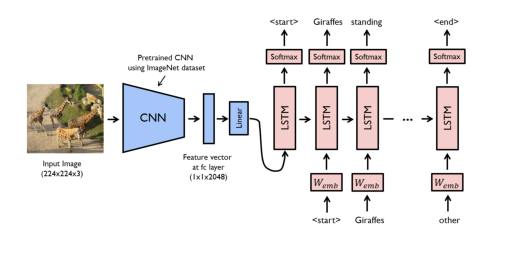

In [38]:
import argparse
import matplotlib.pyplot as plt
from PIL import Image

# Set up the argument parser
parser = argparse.ArgumentParser(description="Process and display an image")
parser.add_argument('--image', type=str, required=True, help='Path to the image')

# Simulate the command-line argument (replace this with your actual path)
args = parser.parse_args(['--image', 'model.png'])

# Open the image
img = Image.open(args.image)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


Problem 3 - Investigate what to do if you want to run it with Keras

The key steps, as outlined, include the following:

- Model Conversion: It was emphasized that the model architecture needs to be recreated in Keras to match the PyTorch model. This is necessary because PyTorch and Keras have different APIs for defining models. Therefore, the model must be manually re-implemented in Keras, ensuring that the layer types, layer configurations (such as activation functions, input dimensions, etc.), and connections are preserved.

- Transfer of Weights: It was noted that to use pre-trained weights from PyTorch in a Keras model, the weights need to be converted into a format that Keras can understand. This process can be complex, as PyTorch and Keras store weights in different formats. The procedure for converting these weights was also explained.

- Data Preparation: It was highlighted that since PyTorch and Keras have different conventions for image formats (e.g., channel order), ensuring the image data is correctly preprocessed for each framework is essential.

Problem 4 - (Advanced assignment) Code reading and rewriting

In [43]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1]      # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs

    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

# Combining the EncoderCNN and DecoderRNN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

class CaptioningModel(Model):
    def __init__(self, encoder, decoder):
        super(CaptioningModel, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, images, captions, lengths):
        features = self.encoder(images)
        outputs = self.decoder(features, captions, lengths)
        return outputs



In [45]:
import tensorflow as tf
from keras.layers import LSTM, Embedding, Dense, Input
from keras.models import Model

class DecoderRNN(tf.keras.Model):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length):
        super(DecoderRNN, self).__init__()
        self.embed = Embedding(vocab_size, embed_size)
        self.num_layers = num_layers
        self.lstm_layers = []

        # Create the LSTM layers dynamically
        for _ in range(num_layers):
            self.lstm_layers.append(LSTM(hidden_size, return_sequences=True, return_state=True))

        self.dense = Dense(vocab_size, activation='sigmoid')
        self.max_seq_length = max_seq_length

    def call(self, inputs, initial_state=None):
        x = self.embed(inputs)

        # Apply stacked LSTM layers
        for lstm in self.lstm_layers:
            x, state_h, state_c = lstm(x, initial_state=initial_state)
            initial_state = [state_h, state_c]  # Update initial state for the next LSTM layer

        output = self.dense(x)
        return output

# Example usage
embed_size = 256
hidden_size = 512
vocab_size = 10000
num_layers = 2
max_seq_length = 20

decoder = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers, max_seq_length)

# Creating a dummy input for testing
input_seq = tf.random.uniform((32, max_seq_length), maxval=vocab_size, dtype=tf.int32)

output = decoder(input_seq)
print(output.shape)


(32, 20, 10000)


Problem 5 - (Advanced assignment) Advanced research

Machine translation techniques have significantly improved translation quality between languages like Japanese and English. Neural Machine Translation (NMT) uses deep learning models, particularly sequence-to-sequence (Seq2Seq) architectures, to translate text. Transformers are a more advanced version of Seq2Seq, replacing recurrent layers with attention mechanisms and becoming the standard for machine translation tasks. Transformer architecture uses self-attention mechanisms to capture dependencies between words in a sentence, regardless of their distance from each other. Key components of Transformers include self-attention, multi-head attention, and positional encoding.

Pre-trained models (Transfer Learning) include Multilingual BERT (mBERT), T5 (Text-to-Text Transfer Transformer), and MarianMT. Reinforcement learning is also used in NMT to optimize translation quality by receiving feedback from human evaluators or predefined metrics.

Generating images from text is another area of interest in computer vision and natural language processing. Generative Adversarial Networks (GANs) are one of the most prominent methods for generating images from text. AttnGAN uses attention mechanisms to refine the generated image based on the details provided in the textual description. StackGAN uses multiple GANs in a stacked manner, while DALL·E is a transformer-based model designed to generate high-quality images from textual descriptions.

CLIP (Contrastive Language-Image Pretraining) is a model trained to understand the relationship between images and textual descriptions. It can be used to generate images by mapping textual descriptions to an embedding space that corresponds to the images. CLIP-based techniques can be used in combination with GANs to condition the generative process on a given textual input. VQ-VAE is another model that can be used for text-to-image generation.

In conclusion, advanced techniques like Transformers, BERT, GPT, and MarianMT have revolutionized machine translation by improving accuracy and efficiency. Attention mechanisms and reinforcement learning also contribute significantly to enhancing translation quality.